This script is essentially a copy of the machine learning graphs and figures script, with a few adaptations. It's purpose is to provide a visualization for the manually identified tubule results (no machine learning, no automation). 

In [1]:
# Imports python helpers
import os 
import numpy as np
import skimage 
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
import math
import statistics 

In [2]:
# Reads excel file into Jupyter Notebook
data = pd.read_excel('/Users/keenanduggal/Desktop/Manual_Selection/!Cell_Line_Comparison_Workbook!.xlsx', header = 5) 
percentareadf = pd.DataFrame(data, columns= ['% Area'])
ardf = pd.DataFrame(data, columns= ['AR'])
areadf = pd.DataFrame(data, columns= ['Area'])
perimdf = pd.DataFrame(data, columns= ['Perim.'])
circdf = pd.DataFrame(data, columns= ['Circ.'])
feretdf = pd.DataFrame(data, columns= ['Feret'])
rounddf = pd.DataFrame(data, columns= ['Round'])
soliditydf = pd.DataFrame(data, columns= ['Solidity'])
meandf = pd.DataFrame(data, columns= ['Mean'])
mindf = pd.DataFrame(data, columns= ['Min'])
maxdf = pd.DataFrame(data, columns= ['Max'])
mindf

,Min
0,NaN
1,18.781406
2,7.657685
3,NaN
4,22.549818
5,8.066033
6,NaN
7,25.255736
8,8.242964
9,NaN


In [3]:
# Dataframes --> Arrays
arArray = np.concatenate(ardf.to_numpy(), axis=0, out=None)
areaArray = np.concatenate(areadf.to_numpy(), axis=0, out=None)
perimArray = np.concatenate(perimdf.to_numpy(), axis=0, out=None)
circArray = np.concatenate(circdf.to_numpy(), axis=0, out=None)
feretArray = np.concatenate(feretdf.to_numpy(), axis=0, out=None)
roundArray = np.concatenate(rounddf.to_numpy(), axis=0, out=None)
solidityArray = np.concatenate(soliditydf.to_numpy(), axis=0, out=None)
meanArray = np.concatenate(meandf.to_numpy(), axis=0, out=None)
percentareaArray = np.concatenate(percentareadf.to_numpy(), axis=0, out=None)
minArray = np.concatenate(mindf.to_numpy(), axis=0, out=None)
maxArray = np.concatenate(maxdf.to_numpy(), axis=0, out=None)

In [4]:
# Removes empty cells (clean-up): 

areaArray = areaArray[np.logical_not(np.isnan(areaArray))]
arArray = arArray[np.logical_not(np.isnan(arArray))]
perimArray = perimArray[np.logical_not(np.isnan(perimArray))]
circArray = circArray[np.logical_not(np.isnan(circArray))]
feretArray = feretArray[np.logical_not(np.isnan(feretArray))]
roundArray = roundArray[np.logical_not(np.isnan(roundArray))]
solidityArray = solidityArray[np.logical_not(np.isnan(solidityArray))]

percentareaArray = percentareaArray[np.logical_not(np.isnan(percentareaArray))]
meanArray = meanArray[np.logical_not(np.isnan(meanArray))]
minArray = minArray[np.logical_not(np.isnan(minArray))]
maxArray = maxArray[np.logical_not(np.isnan(maxArray))]

In [5]:
# Sorts the values from each column into different containers (Average Area, STD Area, etc...)
# This cell is necessary because in each column in the excel file, there are both mean values and standard deviation values. 
# Extraction1 sorts the Mean and Std measurements into seperate containers. 

# Averages:
Aarea = []
AaspectRatio = []
Aperimeter = []
Acircularity = []
Aferet = []
Aroundness = []
Asolidity = [] 

ApercentArea = []
Amean = []
Amin = []
Amax = []

#Standard Deviations 
Sarea = []
SaspectRatio = []
Sperimeter = []
Scircularity = []
Sferet = []
Sroundness = []
Ssolidity = [] 

SpercentArea = []
Smean = []
Smin = []
Smax = []

def extraction1(array, newAList, newSList):
    i = 0 
    for i in range(len(array)):
        if (i % 2 == 0):
            newAList.append(array[i])
        else:
            newSList.append(array[i])

        
extraction1(arArray, AaspectRatio, SaspectRatio)
extraction1(areaArray, Aarea, Sarea)
extraction1(perimArray, Aperimeter, Sperimeter)
extraction1(circArray, Acircularity, Scircularity)
extraction1(feretArray, Aferet, Sferet)
extraction1(roundArray, Aroundness, Sroundness)
extraction1(solidityArray, Asolidity, Ssolidity)

extraction1(percentareaArray, ApercentArea, SpercentArea)
extraction1(meanArray, Amean, Smean)
extraction1(minArray, Amin, Smin)
extraction1(maxArray, Amax, Smax)



In [6]:
# Creates master list (list of lists) for both mean and STD data

measurements = []
measurements.append(Aarea)
measurements.append(Aperimeter)
measurements.append(Aferet)
measurements.append(AaspectRatio)
measurements.append(Aroundness)
measurements.append(Asolidity)
measurements.append(Acircularity)

measurements.append(ApercentArea)
measurements.append(Amean)
measurements.append(Amin)
measurements.append(Amax)


error = []
error.append(Sarea)
error.append(Sperimeter)
error.append(Sferet)
error.append(SaspectRatio)
error.append(Sroundness)
error.append(Ssolidity)
error.append(Scircularity)

error.append(SpercentArea)
error.append(Smean)
error.append(Smin)
error.append(Smax)

In [7]:
# names of the measurements that are being visualized:

names = [
    'Area', 
    'Perimeter', 
    'Feret', 
    'AspectRatio',
    'Roundness',
    'Solidity',
    'Circularity',
    'PercentArea',
    'Mean',
    'Min',
    'Max',]

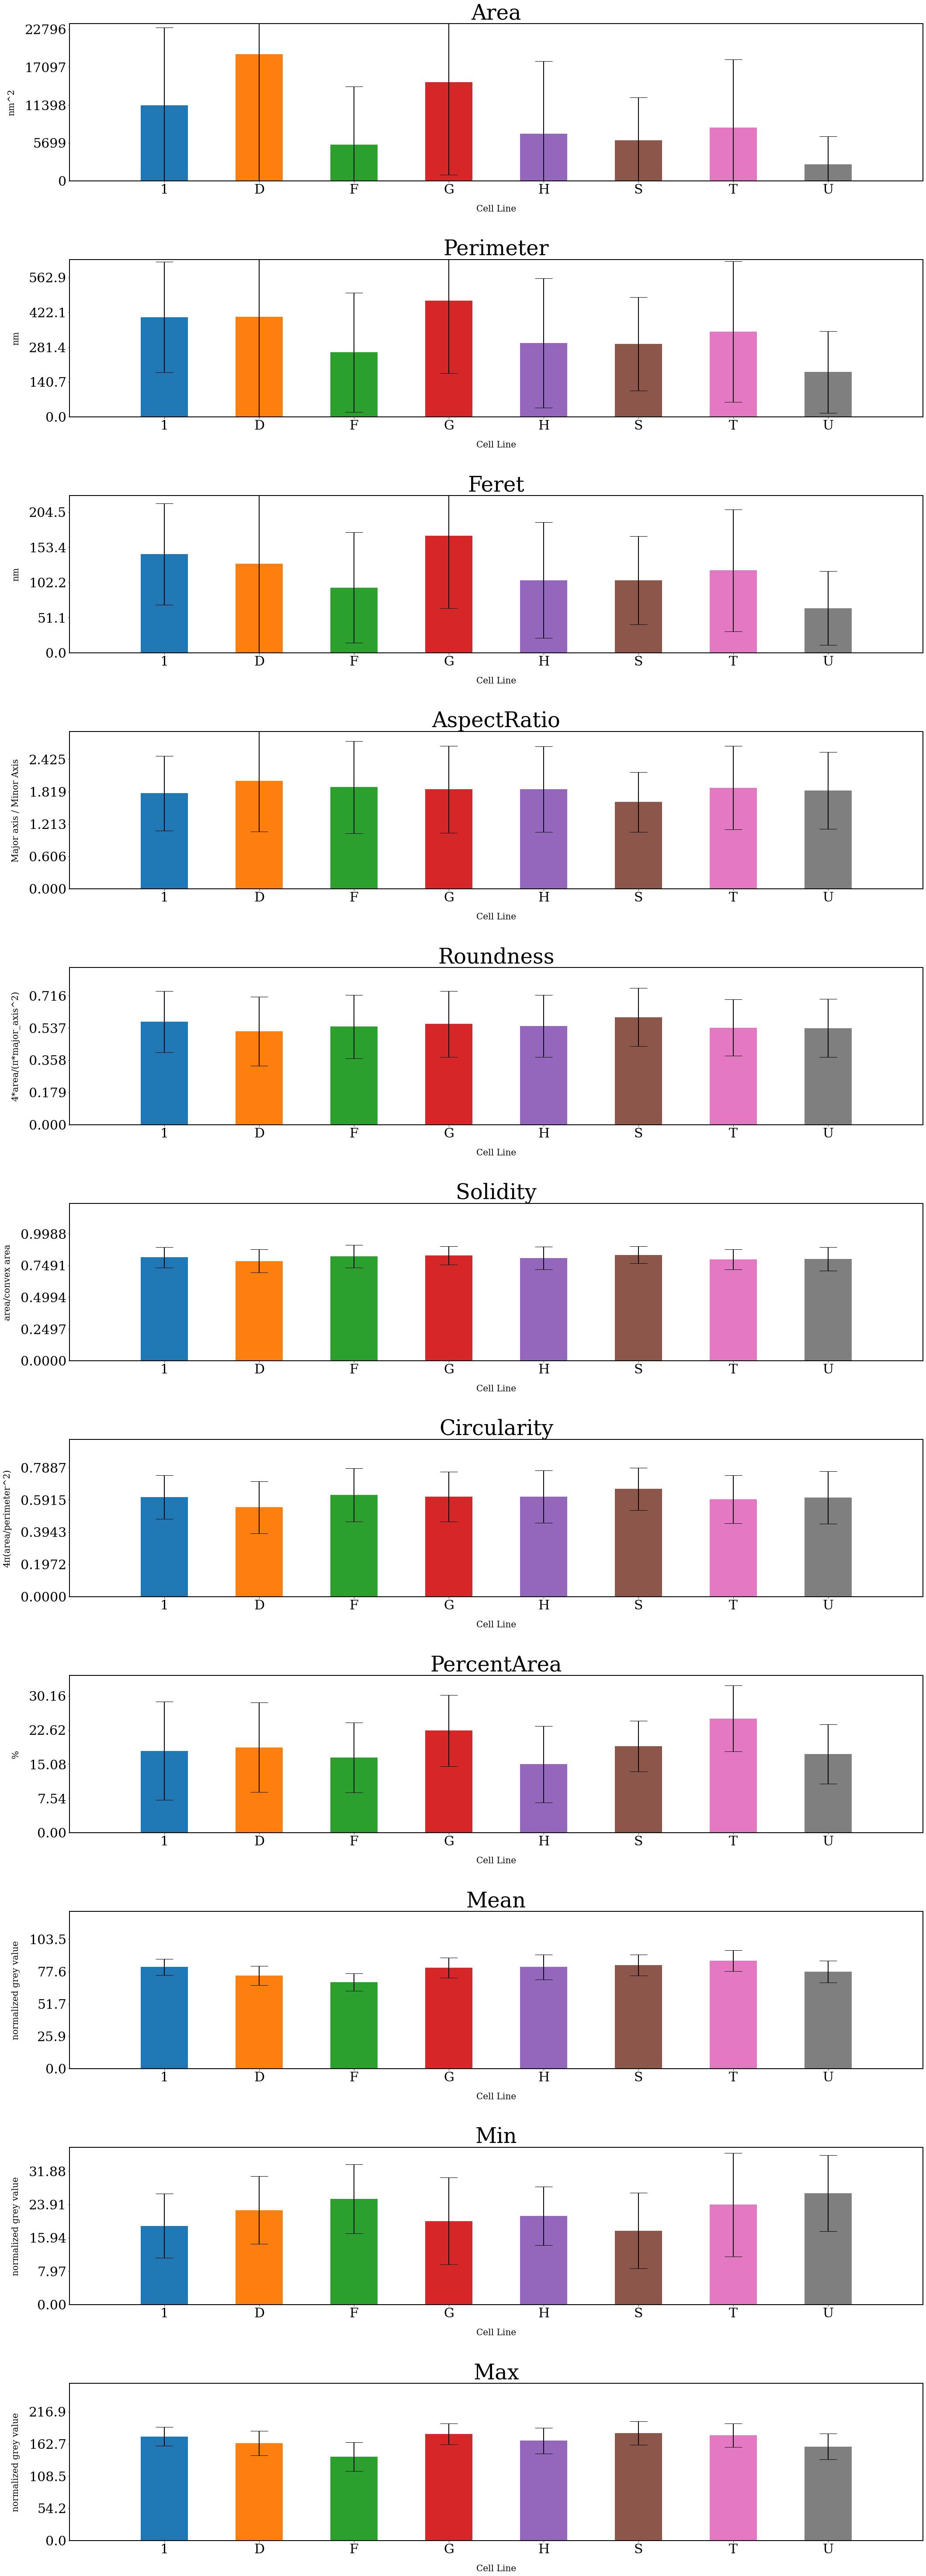

In [9]:
# Does the actual plotting (stylized):

# more professional plots
plt.rcParams.update({'xtick.labelsize': 30})
plt.rcParams.update({'ytick.labelsize': 30})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'axes.linewidth': 2.0})
plt.rcParams.update({'axes.labelpad': 20.0})
plt.rcParams.update({'axes.xmargin': 0.1})
plt.rcParams.update({'axes.ymargin': 0.1})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'errorbar.capsize': 20})


# Creats plot of subplots:
fig, axs = plt.subplots(len(measurements), figsize = (35,100))

labels = ['1', 'D', 'F', 'G', 'H', 'S', 'T', 'U']
ylabels = ['nm^2', 'nm', 'nm', 'Major axis / Minor Axis','4*area/(π*major_axis^2)', 'area/convex area', '4π(area/perimeter^2)', '%', 'normalized grey value', 'normalized grey value', 'normalized grey value']

# Goes through measurement by measurement and creates a bar for each cell line
for i in range(len(measurements)):
    x = np.arange(len(labels))
    for j in range(len(measurements[i])):
        #Remember, names come from seperate name list (don't let them get out of sync!!!)
        plt.rcParams.update({'font.size': 40})
        axs[i].set_title(names[i])
        plt.rcParams.update({'font.size': 30})
        axs[i].set_ylabel(ylabels[i])
        axs[i].set_xlabel("Cell Line")
        plt.rcParams.update({'font.size': 25})
        axs[i].set_xticks(x)
        axs[i].set_yticks(np.arange(0, max(measurements[i]) * 1.5, 0.2 * (max(measurements[i]) * 1.5)))
        axs[i].set_xticklabels(labels)
        # This puts artifical bounds on the data. Don't include if you don't want:
        axs[i].set_ylim(bottom = 0, top = max(measurements[i]) + statistics.mean(measurements[i]) / 2)
        axs[i].bar(x[j], measurements[i][j], yerr = error[i][j], width=0.5, bottom = 0, align='center')
 
    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()